### 생선 분류 
 - 데이터셋 : iris.csv.
 - 피쳐/특성 : sepal.length, petal.length
 - 타겟/ 라벨 : variety
 - 학습 방법 : 지도 학습 = > 분류
 - 학습 알고리즘 : 최근접이웃알고리즘

#### 1. 데이터 준비

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_file = '../data/iris.csv'

In [3]:
# 행 : Bream, Smelt   컬럼 : sepal.length, petal.length, variety=> 0,2,4
irisDF = pd.read_csv(DATA_file, usecols=[0,2,4])# 컬럼명도 가능
irisDF.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


In [4]:
mask = (irisDF["variety"] == "Setosa")| (irisDF["variety"] == "Versicolor")
irisDF1 = irisDF[mask]
irisDF1.reset_index(drop=True, inplace=True)
irisDF1.index

RangeIndex(start=0, stop=100, step=1)

In [5]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols = irisDF1["variety"].replace({"Setosa":0, "Versicolor":1})
irisDF1['Code'] = new_cols

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_5456\1523418920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisDF1['Code'] = new_cols


In [6]:
irisDF1.head(5)

,sepal.length,petal.length,variety,Code
0,5.1,1.4,Setosa,0
1,4.9,1.4,Setosa,0
2,4.7,1.3,Setosa,0
3,4.6,1.5,Setosa,0
4,5.0,1.4,Setosa,0


In [7]:
pd.set_option('display.max_rows', None)  # 행 전체 출력
irisDF1

,sepal.length,petal.length,variety,Code
0,5.1,1.4,Setosa,0
1,4.9,1.4,Setosa,0
2,4.7,1.3,Setosa,0
3,4.6,1.5,Setosa,0
4,5.0,1.4,Setosa,0
5,5.4,1.7,Setosa,0
6,4.6,1.4,Setosa,0
7,5.0,1.5,Setosa,0
8,4.4,1.4,Setosa,0
9,4.9,1.5,Setosa,0


#### 2. 피쳐와 타겟 분리

In [8]:
features = irisDF1[["sepal.length", "petal.length"]]
target = irisDF1['Code']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (100, 2), 2D
target: (100,), 1D


#### 3. 데이터셋 준비 --> 학습용, 테스트용

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify = target,
                                                    random_state=10)

In [11]:

print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (80, 2), 2D
y_train : (80,), 1D
x_test : (20, 2), 2D
y_test : (20,), 1D


In [12]:
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.5, 0.5)

In [13]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.5, 0.5)

#### 4. 검증

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier()

In [16]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64),
 array(['sepal.length', 'petal.length'], dtype=object),
 80)

In [18]:
model.score(x_test, y_test)

1.0

#### 6. 예측하기

In [19]:
new_data =pd.DataFrame([[6,5]], columns=model.feature_names_in_)
new_data

,sepal.length,petal.length
0,6,5


In [20]:
model.predict(new_data)

array([1], dtype=int64)

In [21]:
distance, idx = model.kneighbors(new_data)

In [22]:
distance

array([[0.1       , 0.2236068 , 0.31622777, 0.31622777, 0.31622777]])

In [23]:
neighbors = idx.reshape(-1).tolist()
neighbors

[26, 44, 77, 30, 13]

In [24]:
irisDF1.iloc[neighbors]

,sepal.length,petal.length,variety,Code
26,5.0,1.6,Setosa,0
44,5.1,1.9,Setosa,0
77,6.7,5.0,Versicolor,1
30,4.8,1.6,Setosa,0
13,4.3,1.1,Setosa,0


In [25]:
irisDF1.iloc [neighbors]['sepal.length'],irisDF1.iloc [neighbors]['petal.length'] 

(26    5.0
 44    5.1
 77    6.7
 30    4.8
 13    4.3
 Name: sepal.length, dtype: float64,
 26    1.6
 44    1.9
 77    5.0
 30    1.6
 13    1.1
 Name: petal.length, dtype: float64)

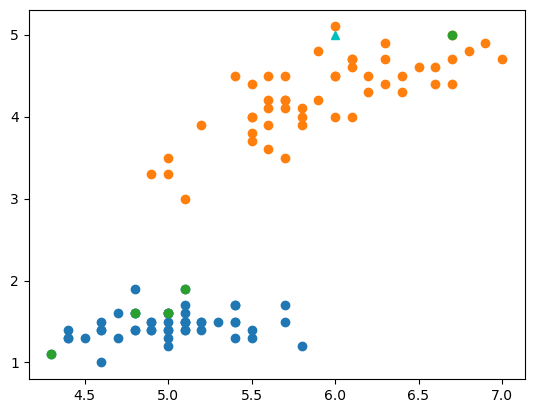

In [26]:
plt.scatter(irisDF1.loc[:49 ,'sepal.length'], irisDF1.loc[:49 ,'petal.length']) 
plt.scatter(irisDF1.loc[50: ,'sepal.length'], irisDF1.loc[50: ,'petal.length'])
plt.plot(new_data['sepal.length'],new_data['petal.length'], 'c^')
plt.scatter(irisDF1.iloc [neighbors]['sepal.length'],irisDF1.iloc [neighbors]['petal.length'] )
plt.show()